## $$ Fuji  DescentIssue $$

In [13]:
import numpy as np

csv_path = "Data/mtfuji_data.csv"  # Specify the file name (path)

np.set_printoptions(suppress=True)  # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [14]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# Problem 1: Data visualization

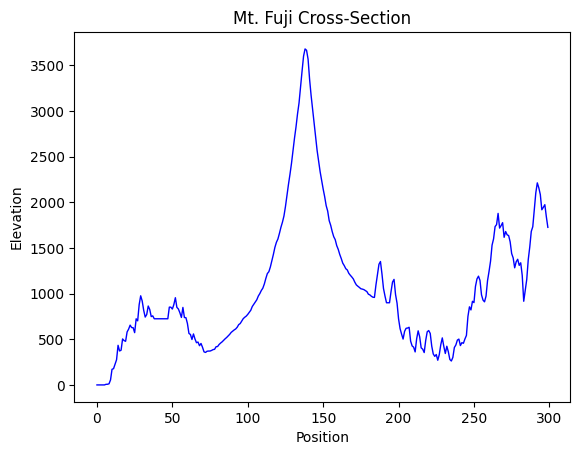

In [15]:
import matplotlib.pyplot as plt

numberpoint = fuji[:,0]
elevation = fuji[:,3]

plt.xlabel("Position")
plt.ylabel("Elevation")
plt.title("Mt. Fuji Cross-Section")
plt.plot(numberpoint,elevation, color='blue' , linewidth=1)
plt.show()



# Problem 2: Create a function to calculate the gradient at a certain point

In [30]:
def slope_calc (x_position):

    dx = fuji[x_position, 0] - fuji[x_position -1, 0]
    dy = fuji[(x_position), 3] - fuji[(x_position -1), 3]
    slope = dy/dx

    return slope

print(slope_calc(110))

25.350000000000136


# Problem 3: Create a function to calculate the destination point

Expressed in the formula "destination point = current point - $\alpha$ × gradient of current point" alpha alphax current point gradient " It will be.

The "gradient of the current point" should be the return value of the function created in question 2. $\alpha$ can take any value greater than 0 Alpha Alpha is a hyperparameter. In machine learning it is called the learning rate. The way it descends depends on this value. Here, for example, it should be set to 0.2.

In [40]:
def slope_calc (x_position):
    
    x_index = int(round(x_position))
    dx = fuji[x_index, 0] - fuji[x_index -1, 0]
    dy = fuji[(x_index), 3] - fuji[(x_index -1), 3]
    slope = dy/dx

    return slope



def destination (start_position, data):
    alpha = .2
    max_iters = 100
    current_pos = float(start_position)

    for _ in range (max_iters):
        current_index = int(round(current_pos))

        if not (1 <= current_index < len(data)):
            print(f"Stopping: Went off the edge of the data at position {current_index}.")
            break
             
        slope = slope_calc (current_pos)

        if abs(slope) < 0.01:
            print(f"Stopping: Slope ({slope:.4f}) is close to zero.")
            break
        
        
        current_pos = current_pos- alpha * slope

    return current_pos
        
start_point = 290
path = destination(start_point, fuji)
path

198.85200000000003

# Problem 5: Visualization of the descent process

In [76]:
def destination (start_position, data):
    path_list = [start_position]
    alpha = .2
    max_iters = 100
    current_pos = float(start_position)

    for _ in range (max_iters):
        current_index = int(round(current_pos))

        if not (1 <= current_index < len(data)):
            print(f"Stopping: Went off the edge of the data at position {current_index}.")
            break
             
        slope = slope_calc (current_pos)

        if abs(slope) < 0.01:
            print(f"Stopping: Slope ({slope:.4f}) is close to zero.")
            break
        
        
        current_pos = current_pos- alpha * slope
        path_list.append(round(current_pos))

    return path_list
        
start_point = 290
path = destination(start_point, fuji)
path

[290,
 253,
 247,
 226,
 238,
 233,
 245,
 237,
 215,
 239,
 229,
 214,
 227,
 214,
 228,
 206,
 205,
 199,
 218,
 191,
 208,
 238,
 233,
 245,
 237,
 215,
 239,
 229,
 214,
 227,
 214,
 228,
 206,
 205,
 199,
 218,
 191,
 208,
 238,
 233,
 245,
 237,
 215,
 239,
 229,
 214,
 227,
 214,
 228,
 206,
 205,
 199,
 218,
 191,
 208,
 238,
 233,
 245,
 237,
 215,
 239,
 229,
 214,
 227,
 214,
 228,
 206,
 205,
 199,
 218,
 191,
 208,
 238,
 233,
 245,
 237,
 215,
 239,
 229,
 214,
 227,
 215,
 239,
 228,
 206,
 206,
 205,
 199,
 218,
 191,
 208,
 238,
 232,
 217,
 224,
 229,
 214,
 228,
 206,
 205,
 199]

# Problem 5, 6 & 7: Change of initial value and Visualization of the descent process

Starting descent from position: 136
Path taken: [136, 102, 98, 95, 92, 90, 87, 84, 81, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 71, 81, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 71, 81, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 71, 81, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 71, 81, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 71, 81]
Final destination: 81


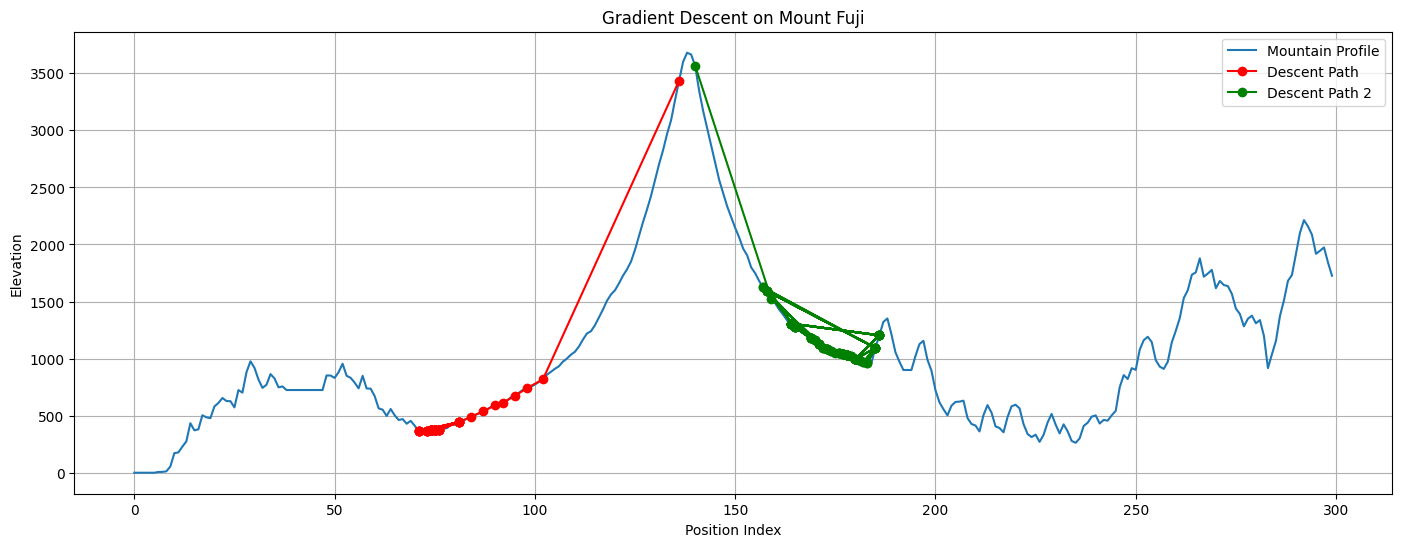

In [80]:
import matplotlib.pyplot as plt
start_point = 136
sp2 = 140

path = destination(start_point, fuji)
path2 = destination(sp2, fuji)

print(f"Starting descent from position: {start_point}")
print(f"Path taken: {path}")
print(f"Final destination: {path[-1]}")

# Visualize the result ---
plt.figure(figsize=(17, 6))
plt.plot(fuji[:, 0], fuji[:, 3], label="Mountain Profile")


# Plot the path taken by the descending point
path_elevations = fuji[path, 3]
path_elevations2 = fuji[path2, 3]


plt.plot(path, path_elevations, 'o-', color='red', label="Descent Path")
plt.plot(path2, path_elevations2, 'o-', color='green', label="Descent Path 2")
plt.title("Gradient Descent on Mount Fuji")
plt.xlabel("Position Index")
plt.ylabel("Elevation")
plt.legend()
plt.grid(True)
plt.show()

# Problem 8: (Advance problem) Hyperparameter changes

Starting descent from position: 290
Taking the alpha value of: 0.6

Path taken: [290, 178, 185, 103, 79, 62, 69, 54, 65, 98, 89, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 73, 65, 98, 89, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 73, 65, 98, 88, 78, 76, 72, 76, 72, 76, 72, 76, 73, 65, 98, 89, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 73, 65, 98, 89, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 72, 76, 73, 65, 98, 89, 76, 72]
Final destination: 72


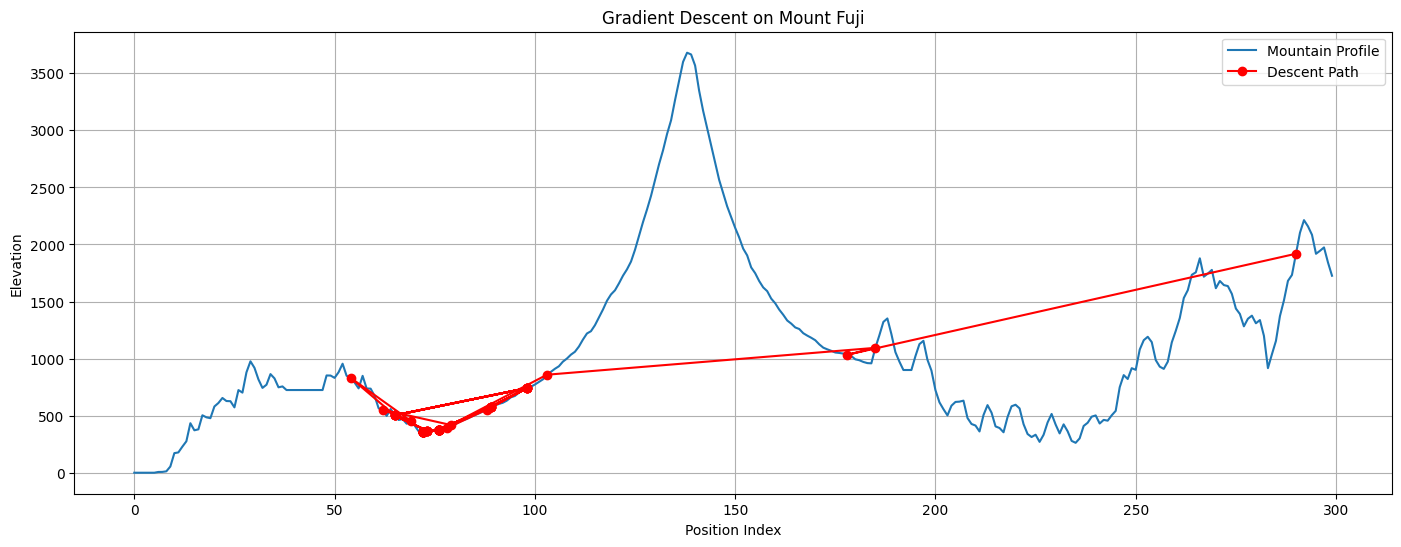

In [90]:
alpha = .6
def destination (start_position, data):
    path_list = [start_position]
    alpha = .6
    max_iters = 100
    current_pos = float(start_position)

    for _ in range (max_iters):
        current_index = int(round(current_pos))

        if not (1 <= current_index < len(data)):
            print(f"Stopping: Went off the edge of the data at position {current_index}.")
            break
             
        slope = slope_calc (current_pos)

        if abs(slope) < 0.01:
            print(f"Stopping: Slope ({slope:.4f}) is close to zero.")
            break
        
        
        current_pos = current_pos- alpha * slope
        path_list.append(round(current_pos))

    return path_list


import matplotlib.pyplot as plt
start_point = 290


path = destination(start_point, fuji)

print(f"Starting descent from position: {start_point}")
print(f"Taking the alpha value of: {alpha}")
print("")
print(f"Path taken: {path}")
print(f"Final destination: {path[-1]}")

# Visualize the result ---
plt.figure(figsize=(17, 6))
plt.plot(fuji[:, 0], fuji[:, 3], label="Mountain Profile")


# Plot the path taken by the descending point
path_elevations = fuji[path, 3]

plt.plot(path, path_elevations, 'o-', color='red', label="Descent Path")
plt.title("Gradient Descent on Mount Fuji")
plt.xlabel("Position Index")
plt.ylabel("Elevation")
plt.legend()
plt.grid(True)
plt.show()